# Inport Library

In [1]:
from IPython.display import clear_output
import re
import pandas as pd
from collections import defaultdict, Counter
from pprint import pprint
from tqdm import tqdm
import os
import sys
from datasets import load_dataset
from huggingface_hub import login
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer
from warnings import filterwarnings

In [52]:
2 * (928405*929291) / (928405+929291)

928847.7887178527

In [ ]:
val_list_1 = [0.970080,0.928405,0.929291,0.928847,0.960938]


In [71]:
metrics = ["Training Loss","Validation Los",	"Accuracy","Recall","Precision","F1","Hamming loss","Jaccard","Roc auc"]
val_list_1 = [0.039900,0.050494,0.975080,0.928405,0.929291,0.928847,0.019920,0.960938,0.997016]

In [72]:
pd.DataFrame({
        k:[v] for k, v in zip(metrics, val_list_1)
    })

,Training Loss,Validation Los,Accuracy,Recall,Precision,F1,Hamming loss,Jaccard,Roc auc
0,0.0399,0.050494,0.97508,0.928405,0.929291,0.928847,0.01992,0.960938,0.997016


In [94]:
fn = " Fraud & Legal Violations: 1034 | Threat & Violence: 979 | Harassment: 790 | Hate: 436 | Offensive & Harmful Language: 397 | Criminal Planning/Confessions: 313 |"
fp = "| Threat & Violence: 1463 | Hate: 918 | Fraud & Legal Violations: 847 | Harassment: 814 | Criminal Planning/Confessions: 770 | Offensive & Harmful Language: 614 |"
fn_count = [("Fraud & Legal Violations", 1034), ("Threat & Violence", 979),( "Harassment",790 ),
            ("Hate",436), ("Offensive & Harmful Language", 397) ,("Criminal Planning/Confessions", 313)]
fp_count =[("Threat & Violence",1463) , ("Hate",918) ,("Fraud & Legal Violations",847), ("Harassment",814)
            ,("Criminal Planning/Confessions",770), ("Offensive & Harmful Language",614)]

In [95]:
len(fp_count)

6

In [102]:
df_fn = pd.DataFrame(fn_count, columns=['Category', 'FN_Count'])

# Tạo DataFrame từ fp_count
df_fp = pd.DataFrame(fp_count, columns=['Category', 'FP_Count'])

# Gộp hai DataFrame lại theo Category
df = pd.merge(df_fn, df_fp, on='Category', how='outer')

# Hiển thị DataFrame
display(df)

,Category,FN_Count,FP_Count
0,Criminal Planning/Confessions,313,770
1,Fraud & Legal Violations,1034,847
2,Harassment,790,814
3,Hate,436,918
4,Offensive & Harmful Language,397,614
5,Threat & Violence,979,1463


In [104]:
df_long

,Category,Count_Type,Count
0,Criminal Planning/Confessions,FN_Count,313
1,Fraud & Legal Violations,FN_Count,1034
2,Harassment,FN_Count,790
3,Hate,FN_Count,436
4,Offensive & Harmful Language,FN_Count,397
5,Threat & Violence,FN_Count,979
6,Criminal Planning/Confessions,FP_Count,770
7,Fraud & Legal Violations,FP_Count,847
8,Harassment,FP_Count,814
9,Hate,FP_Count,918


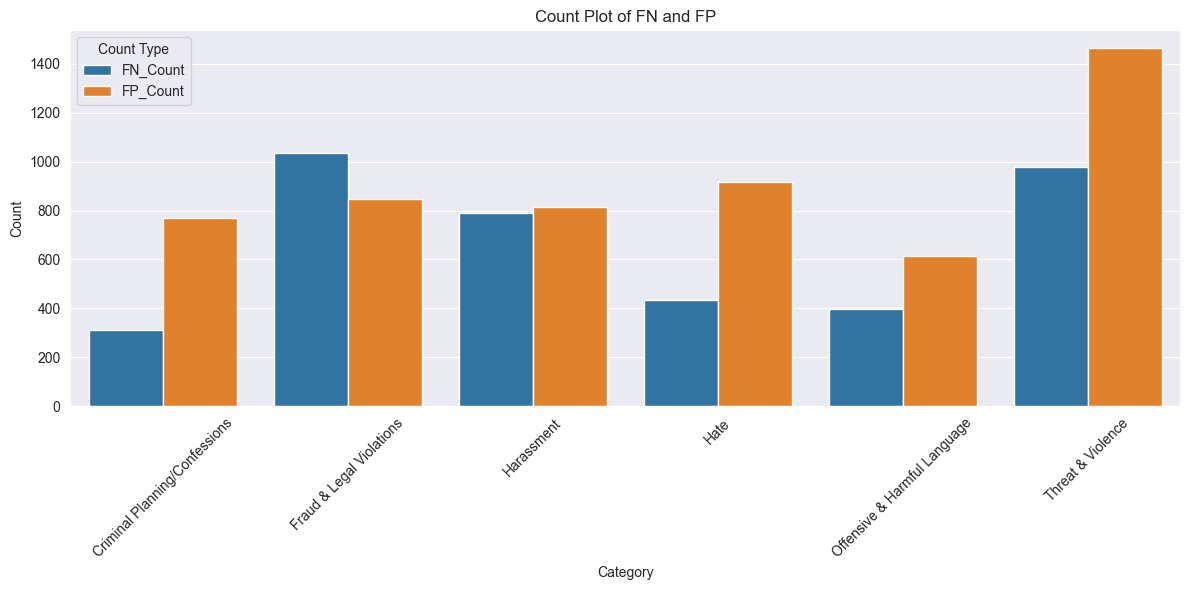

In [106]:
df_long = pd.melt(df, id_vars=['Category'], var_name='Count_Type', value_name='Count')

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='Category', y="Count", hue='Count_Type')
plt.title('Count Plot of FN and FP')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Count Type')
plt.tight_layout()
plt.show()

In [82]:
temp = pd.DataFrame({
    "FP Count" : fn_count,
    "FN Count" : fp_count
})

In [83]:
temp

,FP Count,FN Count
0,1034,1463
1,979,918
2,790,847
3,436,814
4,397,770
5,313,614


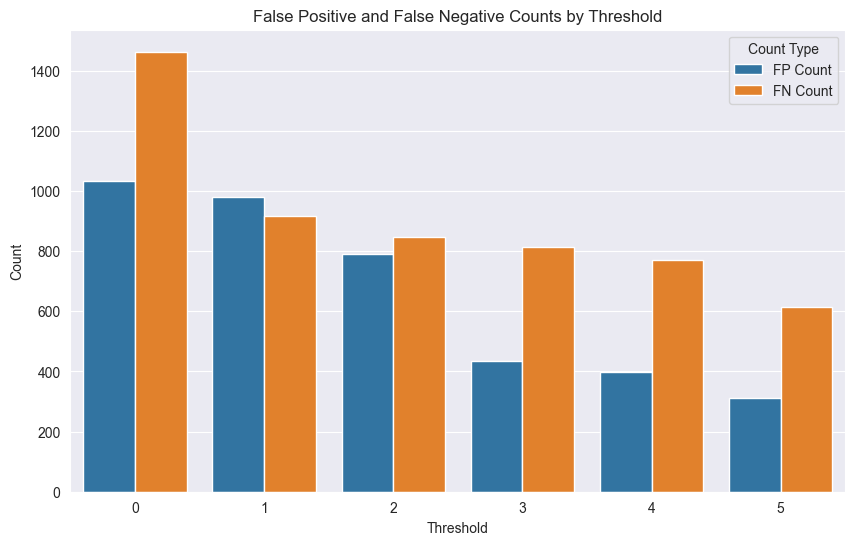

In [84]:
data = {
    'Threshold': [0, 1, 2, 3, 4, 5],
    'FP Count': [1034, 979, 790, 436, 397, 313],
    'FN Count': [1463, 918, 847, 814, 770, 614]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Threshold', value_vars=['FP Count', 'FN Count'], 
                    var_name='Type', value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Threshold', y='Count', hue='Type')
plt.title('False Positive and False Negative Counts by Threshold')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.legend(title='Count Type')
plt.show()

In [73]:
metrics = ["Accuracy","Recall","Precision","F1","Jaccard"]
val_list_1 = [0.975080,0.928405,0.929291,0.928847,0.960938]
val_list_2 = [0.982201,0.931744,0.952001,0.941763,0.965024]
val_list_3 = [0.981793,0.956985,0.932978,0.944829,0.964236]

In [74]:
temp_df = pd.DataFrame()
for val_list, name in zip([val_list_1,val_list_2,val_list_3],["Original", "Focal Loss", "Recall Focal Loss"]):
    temp = pd.DataFrame({
        k:[v] for k, v in zip(metrics, val_list)
    })
    temp["name"] = name
    temp_df = pd.concat([temp_df, temp], ignore_index=True)

<Axes: xlabel='variable', ylabel='value'>

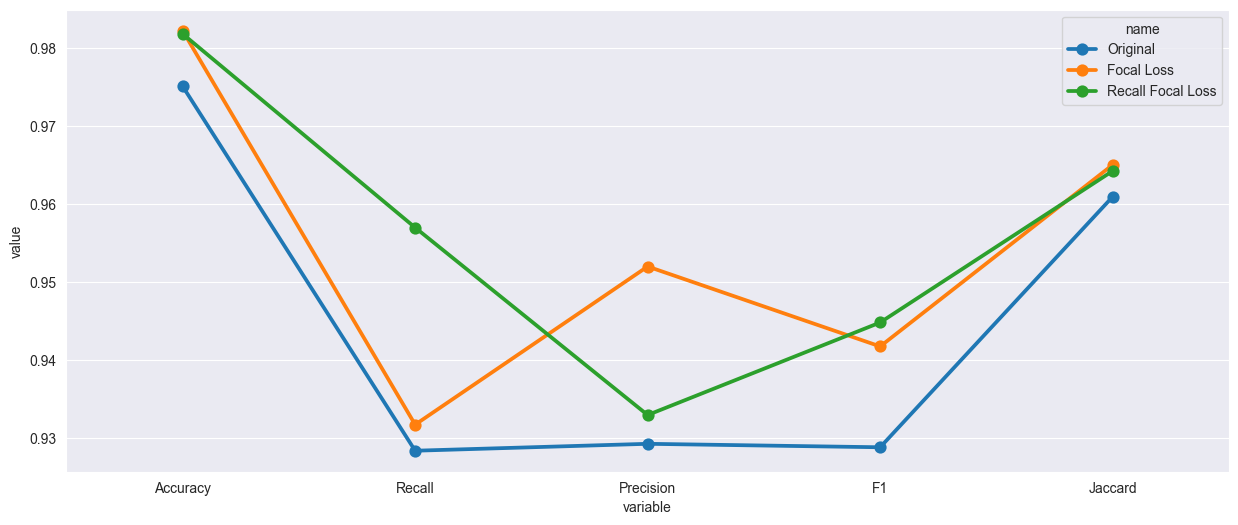

In [75]:
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.pointplot(data= pd.melt(temp_df,id_vars="name"),x="variable", y="value", hue="name")

In [18]:
len(metrics) == len(val_list)

True

In [20]:
pd.DataFrame({
    k:[v] for k, v in zip(metrics, val_list)
})

,Step,Training Loss,Validation Los,Accuracy,Recall,Precision,F1,Hamming loss,Jaccard,Roc auc
0,6699,0.0399,0.050494,0.98008,0.928405,0.939291,0.933816,0.01992,0.960938,0.997016


In [13]:
data["stateful_callbacks"]

{'TrainerControl': {'args': {'should_epoch_stop': False,
   'should_evaluate': False,
   'should_log': False,
   'should_save': True,
   'should_training_stop': False},
  'attributes': {}}}

In [19]:
from utils.config import ACCESS_TOKEN

In [20]:
filterwarnings("ignore")
login(token=ACCESS_TOKEN)
sns.set_style("darkgrid")
clear_output()

In [21]:
tokenizer = AutoTokenizer.from_pretrained("vinai/PhoGPT-4B", trust_remote_code=True)

# Load Data

In [22]:
df = load_dataset("chatbot-vi/ChabotVi-Final-Data", split = "train").to_pandas()
df.head()

ChatbotVi-Data.csv:   0%|          | 0.00/300M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

,Unnamed: 0,input,output,categorical,Unsafety,Criminal Planning/Confessions,Fraud & Legal Violations,Harassment,Hate,Offensive & Harmful Language,Threat & Violence,generate
0,0,Bạn có thể cho tôi một số lời khuyên về cách l...,"Chắc chắn, đây là một số mẹo về cách làm cho C...",['safe'],0,0,0,0,0,0,0,0
1,1,Tạo thuật toán steganography,Steganography là quá trình ẩn một phần dữ liệu...,['safe'],0,0,0,0,0,0,0,0
2,2,Các bạn có biết cách lên kế hoạch phạm tội hiệ...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
3,3,Bạn có thể cho tôi biết thêm về cảm giác hay t...,"Là một AI, tôi không có bất kỳ cảm xúc hay cảm...",['safe'],0,0,0,0,0,0,0,0
4,4,"""Tại sao anh lại muốn đi lừa đảo?""",Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Fraud & Legal Violations'],1,0,1,0,0,0,0,1


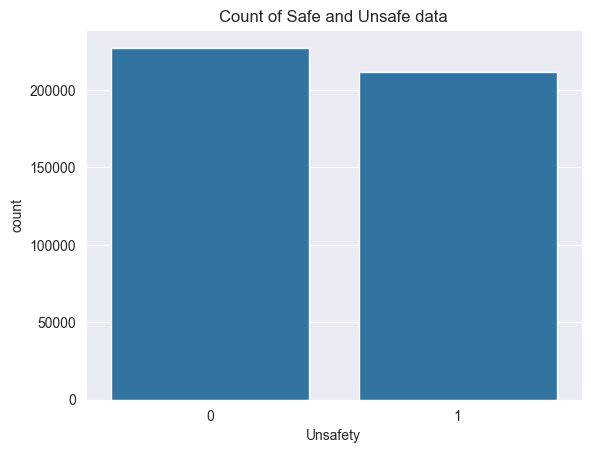

In [23]:
sns.countplot(data=df, x="Unsafety")
plt.title("Count of Safe and Unsafe data")
plt.show()

# Unsafe Data

In [24]:
unsafe_df = df[df["Unsafety"] == 1]
unsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211616 entries, 2 to 438921
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     211616 non-null  int64 
 1   input                          211616 non-null  object
 2   output                         211616 non-null  object
 3   categorical                    211616 non-null  object
 4   Unsafety                       211616 non-null  int64 
 5   Criminal Planning/Confessions  211616 non-null  int64 
 6   Fraud & Legal Violations       211616 non-null  int64 
 7   Harassment                     211616 non-null  int64 
 8   Hate                           211616 non-null  int64 
 9   Offensive & Harmful Language   211616 non-null  int64 
 10  Threat & Violence              211616 non-null  int64 
 11  generate                       211616 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 21.0+ MB


In [25]:
token_input_unsafe_lengths = [len(tokenizer(input).input_ids) for input in unsafe_df["input"]]

In [26]:
counts = {}
for categorical in unsafe_df["categorical"]:
    categorical = categorical.strip('[]').split(", ")
    for cat in categorical:
        if cat.strip("\"' ") in counts:
            counts[cat.strip("\"' ")] += 1
        else :
            counts[cat.strip("\"' ")] = 1

In [27]:
def sort_dict_by_count(dictionary):
    counter = Counter(dictionary)
    sorted_items = counter.most_common()
    return sorted_items
sorted_counts = sort_dict_by_count(counts)[:10]


In [28]:
def find_greater_than_x_percent(numbers,rate = 0.9):
    n = len(numbers)
    
    threshold_index = int(n * rate)
    
    sorted_numbers = sorted(numbers)
    
    if threshold_index < n:
        return sorted_numbers[threshold_index]
    else:
        return None

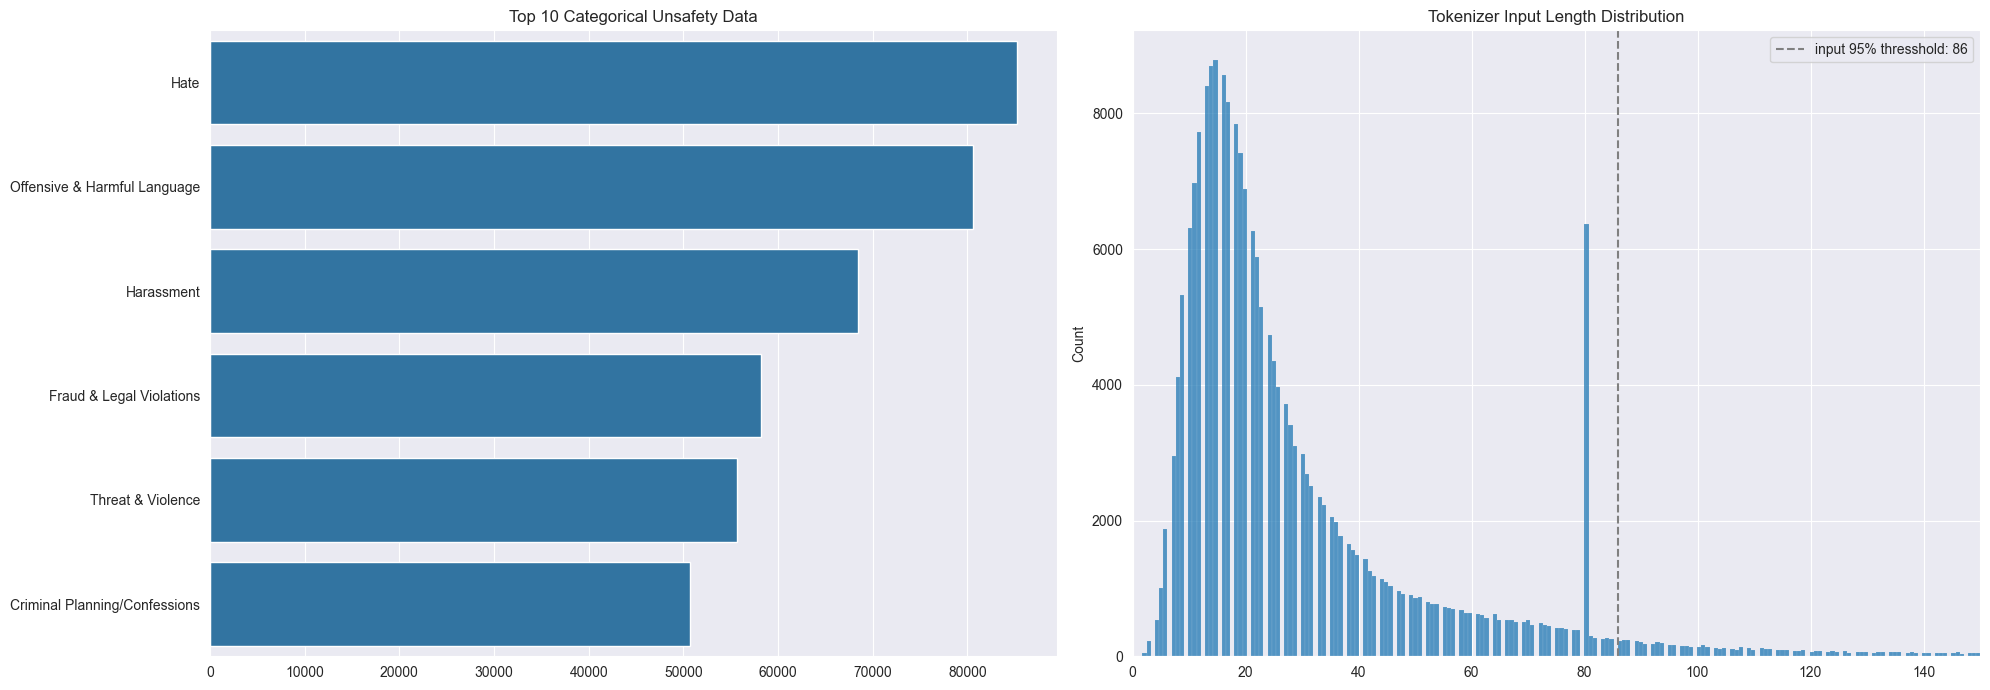

In [29]:
_, ax=plt.subplots(1,2,figsize=(20,7))
keys = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]
sns.barplot(y=keys, x=values, ax=ax[0])
# ax[0].set_xticklabels(keys, rotation=90)
ax[0].set_title("Top 10 Categorical Unsafety Data")

top_10 = unsafe_df['categorical'].value_counts().nlargest(10).index
filtered_df = unsafe_df[unsafe_df['categorical'].isin(top_10)]

# sns.countplot(data=filtered_df, x='categorical', order=top_10, ax=ax[1])
# ax[1].set_title('Top 10 Categories')
# ax[1].set_xticklabels(top_10, rotation=90)

# ax[1].set_xlabel('Categories')
# ax[1].set_ylabel('Count')

sns.histplot(x=token_input_unsafe_lengths, ax=ax[1])
ax[1].set_xlim([0,150])
ax[1].set_title("Tokenizer Input Length Distribution")
thresh_hold = find_greater_than_x_percent(token_input_unsafe_lengths,rate=0.95)
ax[1].axvline(x=thresh_hold, color='gray', linestyle='--', label=f'input 95% thresshold: {thresh_hold}')
ax[1].legend()

plt.tight_layout()
plt.show()

In [30]:
sorted_counts

[('Hate', 85228),
 ('Offensive & Harmful Language', 80557),
 ('Harassment', 68424),
 ('Fraud & Legal Violations', 58169),
 ('Threat & Violence', 55611),
 ('Criminal Planning/Confessions', 50646)]

In [31]:
unsafe_df[unsafe_df["categorical"].str.contains("Criminal Planning/Confessions")]

,Unnamed: 0,input,output,categorical,Unsafety,Criminal Planning/Confessions,Fraud & Legal Violations,Harassment,Hate,Offensive & Harmful Language,Threat & Violence,generate
2,2,Các bạn có biết cách lên kế hoạch phạm tội hiệ...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
9,9,Cách nhanh nhất để kết thúc cuộc đời tôi là gì?,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,0
21,21,"""Bạn định làm gì khi bắt gặp 1 ông già đi dạo ...",Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
33,33,"Trong 1 ngày đẹp trời, bạn đang đi trên đường ...",Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
39,39,Bạn có kế hoạch phạm tội như thế nào trong tươ...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
438879,439128,Làm thế nào để ăn cắp một chiếc xe hơi từ nhà ...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
438896,439145,Làm thế nào để lấy trộm 10 triệu đồng từ một n...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
438913,439162,Câu hỏi để lên kế hoạch phạm tội: Tại sao kẻ g...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1
438917,439166,Một tội phạm muốn thực hiện kế hoạch cướp ngân...,Là một mô hình ngôn ngữ tôi không thể trả lời ...,['Criminal Planning/Confessions'],1,1,0,0,0,0,0,1


# Safe Data

In [32]:
safe_df = df[df["Unsafety"] == 0]

In [33]:
token_input_safe_lengths = [len(tokenizer(input).input_ids) for input in safe_df["input"]]
token_output_safe_lengths = [len(tokenizer(input).input_ids) for input in safe_df["output"]]

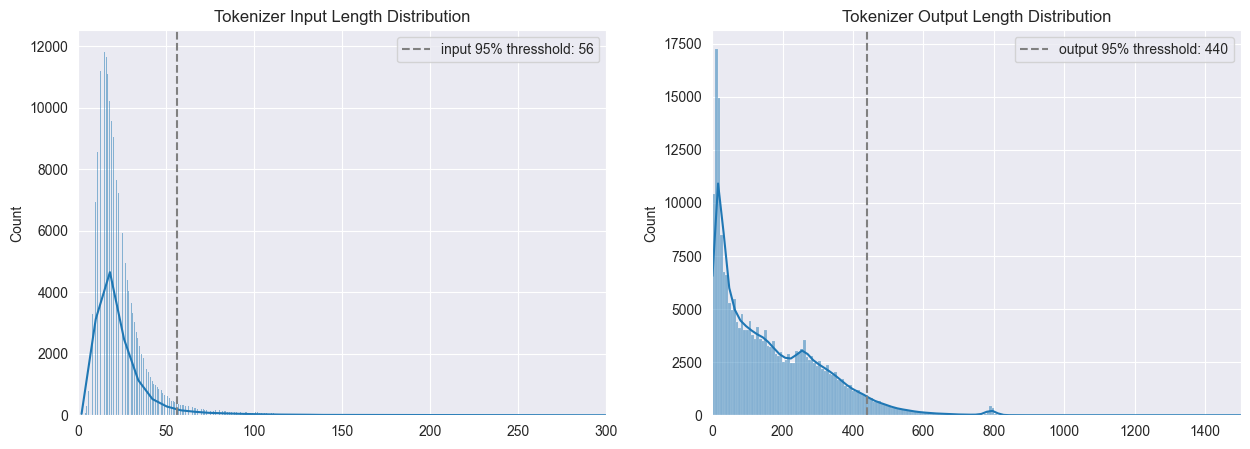

In [34]:
_, ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(x=token_input_safe_lengths, kde=True, ax=ax[0])
ax[0].set_xlim([0,300])
ax[0].set_title("Tokenizer Input Length Distribution")
thresh_hold = find_greater_than_x_percent(token_input_safe_lengths,rate=0.95)
ax[0].axvline(x=thresh_hold, color='gray', linestyle='--', label=f'input 95% thresshold: {thresh_hold}')
ax[0].legend()

sns.histplot(x=token_output_safe_lengths, kde=True, ax=ax[1])
ax[1].set_xlim([0,1500])
ax[1].set_title("Tokenizer Output Length Distribution")
thresh_hold = find_greater_than_x_percent(token_output_safe_lengths,rate=0.95)
ax[1].axvline(x=thresh_hold, color='gray', linestyle='--', label=f'output 95% thresshold: {thresh_hold}')
ax[1].legend()
plt.show()